In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PATH = 'results/results.json'

plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
df = pd.read_json(PATH)
df

,model,prompt,ex_simple,ex_moderate,ex_challenging,ex_total,va_simple,va_moderate,va_challenging,va_total,ves,em
0,gemini_1.5_Flash,zero_shot,59.259259,63.636364,20.000000,55.813953,98.765432,100.000000,86.666667,97.674419,56.444137,6.201550
1,chatgpt_4mini,zero_shot,54.320988,54.545455,26.666667,51.162791,100.000000,100.000000,93.333333,99.224806,53.029110,4.651163
2,gemini_1.5_Flash,zero_shot_hint,81.481481,66.666667,46.666667,73.643411,96.296296,81.818182,80.000000,90.697674,73.943372,4.651163
3,chatgpt_4mini,zero_shot_hint,83.950617,75.757576,80.000000,81.395349,100.000000,100.000000,100.000000,100.000000,83.016343,4.651163
4,gemini_1.5_Flash,few_shot,75.308642,63.636364,40.000000,68.217054,100.000000,90.909091,100.000000,97.674419,69.162806,5.426357
5,chatgpt_4mini,few_shot,69.135802,60.606061,13.333333,60.465116,98.765432,93.939394,93.333333,96.899225,59.922247,5.426357
6,gemini_1.5_Flash,few_shot_hint,87.654321,78.787879,60.000000,82.170543,100.000000,100.000000,100.000000,100.000000,82.075955,6.976744
7,chatgpt_4mini,few_shot_hint,87.654321,72.727273,20.000000,75.968992,100.000000,100.000000,93.333333,99.224806,75.461478,3.875969


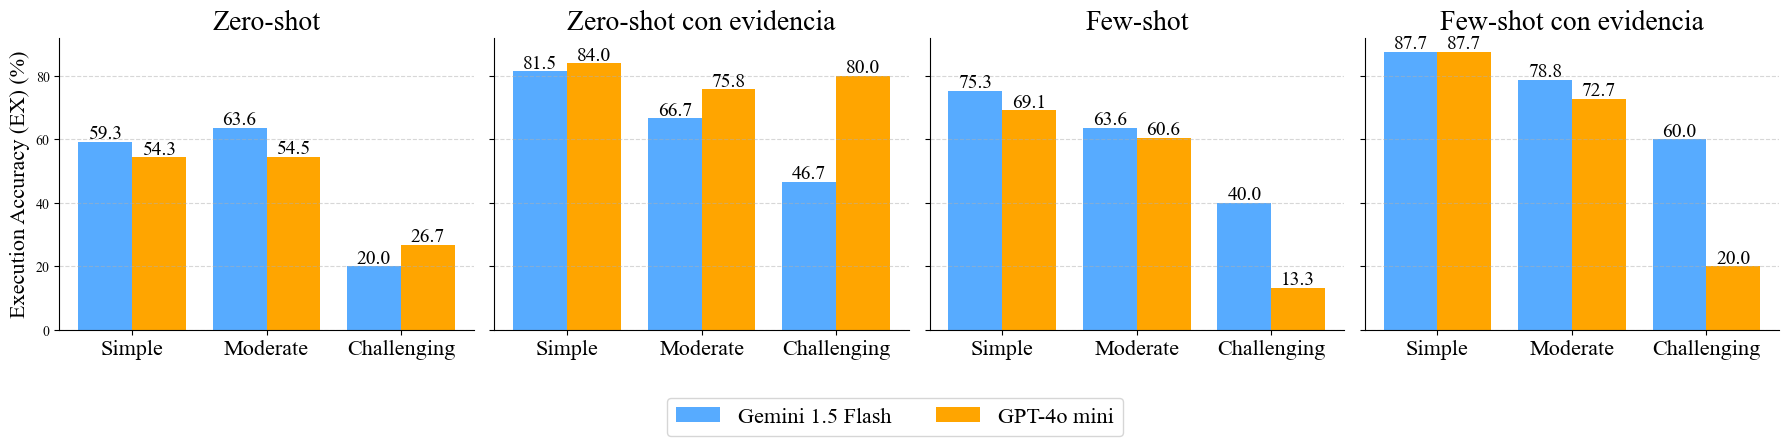

In [38]:
# Categorías (eje X)
categories = ['Simple', 'Moderate', 'Challenging']

# Datos
gemini = [59.259259, 63.636364, 20.000000]  
gpt = [54.320988, 54.545455, 26.666667]

gemini_evid = [81.481481, 66.666667, 46.666667]
gpt_evid = [83.950617, 75.757576, 80.000000]

gemini_2 = [75.308642, 63.636364, 40.000000]
gpt_2 = [69.135802, 60.606061, 13.333333]

gemini_evid_2 = [87.654321, 78.787879, 60.000000]
gpt_evid_2 = [87.654321, 72.727273, 20.000000]

# Configuración del gráfico
x = np.arange(len(categories))  # Posición de las categorías en el eje X
width = 0.4  # Ancho de las barras

# Crear un gráfico con 1 fila y 4 columnas
fig, axs = plt.subplots(1, 4, figsize=(18, 4), sharey=True)  # 1 fila, 4 columnas

# Gráficos individuales
datasets = [
    (gemini, gpt, 'Zero-shot', axs[0], '#57abff', 'orange'),
    (gemini_evid, gpt_evid, 'Zero-shot con evidencia', axs[1], '#57abff', 'orange'),
    (gemini_2, gpt_2, 'Few-shot', axs[2], '#57abff', 'orange'),
    (gemini_evid_2, gpt_evid_2, 'Few-shot con evidencia', axs[3], '#57abff', 'orange'),
]

for data, ax in zip(datasets, axs):
    gem, gpt, title, ax, color_gemini, color_gpt = data
    bars1 = ax.bar(x - 0.5 * width, gem, width, label='Gemini 1.5 Flash', color=color_gemini)
    bars2 = ax.bar(x + 0.5 * width, gpt, width, label='GPT-4o mini', color=color_gpt)

    # Configuración de cada subgráfico
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=16)
    ax.set_ylim(0, 92)
    ax.set_title(title, fontsize=20)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Mostrar valores encima de las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=14)

# Configuración del eje Y compartido
axs[0].set_ylabel('Execution Accuracy (EX) (%)', fontsize=16)

# Agregar leyenda general
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=16, bbox_to_anchor=(0.5, 0.02))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('imagen/ex_total_1x4.png', dpi=500, bbox_inches='tight')
plt.show()


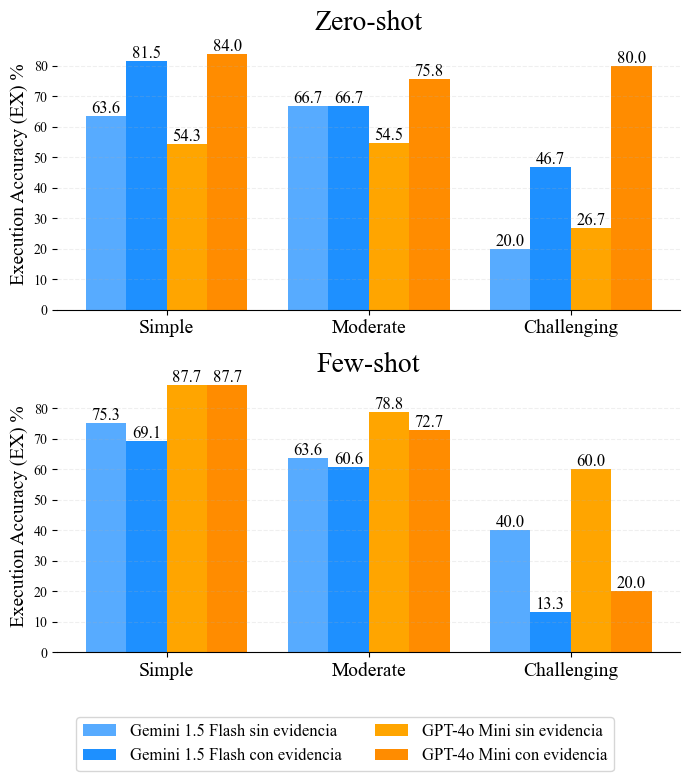

In [22]:
# Categorias (eje X)
categories = ['Simple', 'Moderate', 'Challenging']

# Zero-shot
gemini = [63.636364, 66.666667, 20.000000]  
gpt = [54.320988, 54.545455, 26.666667]

# Zero-shot con evidencia
gemini_evid = [81.481481, 66.666667, 46.666667]
gpt_evid = [83.950617, 75.757576, 80.000000]

# Few-shot 
gemini_2 = [75.308642, 63.636364, 40.000000]
gpt_2 = [87.654321, 78.787879, 60.000000]

# Few-shot con evidencia
gemini_evid_2 = [69.135802, 60.606061, 13.333333]
gpt_evid_2 = [87.654321, 72.727273, 20.000000]


x = np.arange(len(categories))  # Posición de las categorías en el eje X
width = 0.2  # Ancho de las barras

# Crear un gráfico con 2 subgráficos (uno arriba y otro abajo)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))  # 2 filas, 1 columna

# Primer gráfico (Zero-shot)
bars1 = ax1.bar(x - 1.5 * width, gemini, width, label='Gemini 1.5 Flash sin evidencia', color='#57abff')
bars2 = ax1.bar(x - 0.5 * width, gemini_evid, width, label='Gemini 1.5 Flash con evidencia', color='dodgerblue')
bars3 = ax1.bar(x + 0.5 * width, gpt, width, label='GPT-4o Mini sin evidencia', color='orange')
bars4 = ax1.bar(x + 1.5 * width, gpt_evid, width, label='GPT-4o Mini con evidencia', color='darkorange')

ax1.set_ylabel('Execution Accuracy (EX) %', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=14)
#ax1.legend(loc='lower left', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.2)
ax1.set_ylim(0, 89)
ax1.set_title('Zero-shot', fontsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Mostrar valores encima de las barras en el primer gráfico
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=12)

# Segundo gráfico (Few-shot)
bars1 = ax2.bar(x - 1.5 * width, gemini_2, width, label='Gemini 1.5 Flash sin evid.', color='#57abff')
bars2 = ax2.bar(x - 0.5 * width, gemini_evid_2, width, label='Gemini 1.5 Flash con evid.', color='dodgerblue')
bars3 = ax2.bar(x + 0.5 * width, gpt_2, width, label='GPT-4o Mini sin evid.', color='orange')
bars4 = ax2.bar(x + 1.5 * width, gpt_evid_2, width, label='GPT-4o Mini con evid.', color='darkorange')

ax2.set_ylabel('Execution Accuracy (EX) %', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontsize=14)
#ax2.legend(loc='lower left', fontsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.2)
ax2.set_ylim(0, 89)
ax2.set_title('Few-shot', fontsize=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.02))

# Mostrar valores encima de las barras en el segundo gráfico
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=12)

# Ajustar el diseño para que no se sobrepongan elementos
plt.tight_layout()

# Guardar la imagen final
plt.savefig('imagen/ex_total_combined.png', dpi=500, bbox_inches='tight')

# Mostrar el gráfico combinado
plt.show()

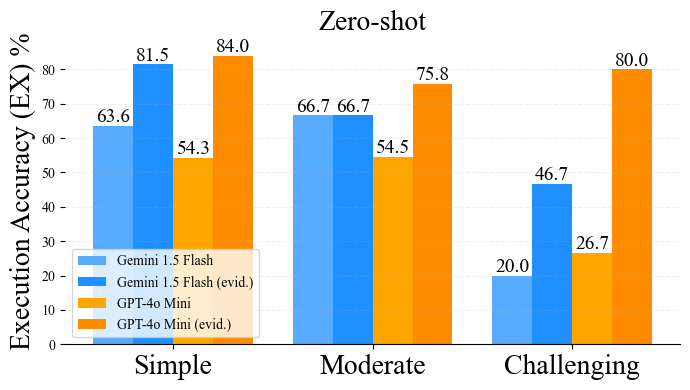

In [75]:
categories = ['Simple', 'Moderate', 'Challenging']
gemini = [63.636364, 66.666667, 20.000000]  # Desempeño de Gemini 1.5 Flash
gemini_evid = [81.481481, 66.666667, 46.666667]
gpt = [54.320988, 54.545455, 26.666667]
gpt_evid = [83.950617, 75.757576, 80.000000]

x = np.arange(len(categories))  # Posición de las categorías en el eje X
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(7, 4))

# Crear barras para cada método
bars1 = ax.bar(x - 1.5 * width, gemini, width, label='Gemini 1.5 Flash', color='#57abff')#'skyblue')
bars2 = ax.bar(x - 0.5 * width, gemini_evid, width, label='Gemini 1.5 Flash (evid.)', color='dodgerblue')
bars3 = ax.bar(x + 0.5 * width, gpt, width, label='GPT-4o Mini', color='orange')
bars4 = ax.bar(x + 1.5 * width, gpt_evid, width, label='GPT-4o Mini (evid.)', color='darkorange')

ax.set_ylabel('Execution Accuracy (EX) %', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=20)
ax.legend(loc='lower left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_ylim(0, 89)
ax.set_title('Zero-shot', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Mostrar valores encima de las barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=14)

plt.tight_layout()
plt.savefig('imagen/ex_total2.png', dpi=500, bbox_inches='tight')
plt.show()

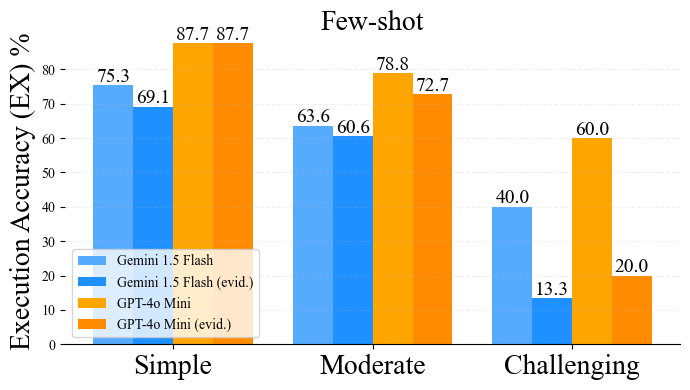

In [ ]:
categories = ['Simple', 'Moderate', 'Challenging']
gemini = [75.308642,	63.636364,	40.000000]  # Desempeño de Gemini 1.5 Flash
gemini_evid = [69.135802,	60.606061,	13.333333]
gpt = [87.654321,	78.787879,	60.000000	]
gpt_evid = [87.654321,	72.727273,	20.000000]

x = np.arange(len(categories))  # Posición de las categorías en el eje X
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(7, 4))

# Crear barras para cada método
bars1 = ax.bar(x - 1.5 * width, gemini, width, label='Gemini 1.5 Flash', color='#57abff')#'skyblue')
bars2 = ax.bar(x - 0.5 * width, gemini_evid, width, label='Gemini 1.5 Flash (evid.)', color='dodgerblue')
bars3 = ax.bar(x + 0.5 * width, gpt, width, label='GPT-4o Mini', color='orange')
bars4 = ax.bar(x + 1.5 * width, gpt_evid, width, label='GPT-4o Mini (evid.)', color='darkorange')

ax.set_ylabel('Execution Accuracy (EX) %', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=20)
ax.legend(loc='lower left', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_ylim(0, 89)
ax.set_title('Few-shot', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Mostrar valores encima de las barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=14)

plt.tight_layout()
plt.savefig('imagen/ex_total22.png', dpi=500, bbox_inches='tight')
plt.show()

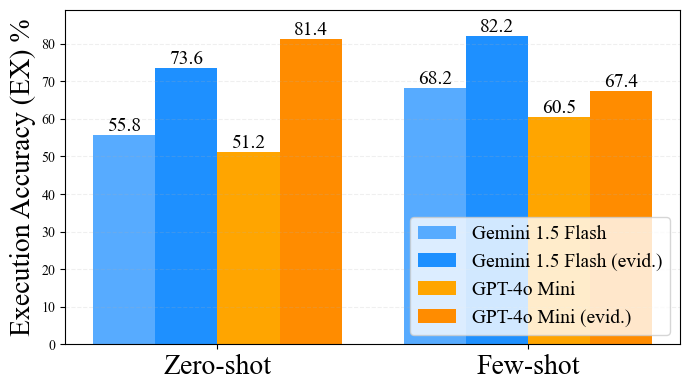

In [ ]:
# Datos
categories = ['Zero-shot', 'Few-shot']
gemini = [55.8, 68.2]  # Desempeño de Gemini 1.5 Flash
gemini_evid = [73.6, 82.2]  # Desempeño de Gemini 1.5 Flash (evid.)
gpt = [51.2, 60.5]  # Desempeño de GPT-4o Mini
gpt_evid = [81.4, 67.4]  # Desempeño de GPT-4o Mini (evid.)

x = np.arange(len(categories))  # Posición de las categorías en el eje X
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(7, 4))

# Crear barras para cada método
bars1 = ax.bar(x - 1.5 * width, gemini, width, label='Gemini 1.5 Flash', color='#57abff')#'skyblue')
bars2 = ax.bar(x - 0.5 * width, gemini_evid, width, label='Gemini 1.5 Flash (evid.)', color='dodgerblue')
bars3 = ax.bar(x + 0.5 * width, gpt, width, label='GPT-4o Mini', color='orange')
bars4 = ax.bar(x + 1.5 * width, gpt_evid, width, label='GPT-4o Mini (evid.)', color='darkorange')

# Añadir etiquetas, título y leyenda
#ax.set_xlabel('Métodos', fontsize=12)
ax.set_ylabel('Execution Accuracy (EX) %', fontsize=20)
#ax.set_title('Desempeño de los métodos en EX', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=20)
ax.legend(loc='lower right', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_ylim(0, 89)



# Mostrar valores encima de las barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=14)

plt.tight_layout()
plt.savefig('imagen/ex_total23.png', dpi=500, bbox_inches='tight')
plt.show()


In [ ]:
# Datos
categories = ['Zero-shot', 'Few-shot']
gemini = [55.8, 68.2]  # Desempeño de Gemini 1.5 Flash
gemini_evid = [73.6, 82.2]  # Desempeño de Gemini 1.5 Flash (evid.)
gpt = [51.2, 60.5]  # Desempeño de GPT-4o Mini
gpt_evid = [81.4, 67.4]  # Desempeño de GPT-4o Mini (evid.)

x = np.arange(len(categories))  # Posición de las categorías en el eje X
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(7, 4))

# Crear barras para cada método
bars1 = ax.bar(x - 1.5 * width, gemini, width, label='Gemini 1.5 Flash', color='#57abff')#'skyblue')
bars2 = ax.bar(x - 0.5 * width, gemini_evid, width, label='Gemini 1.5 Flash (evid.)', color='dodgerblue')
bars3 = ax.bar(x + 0.5 * width, gpt, width, label='GPT-4o Mini', color='orange')
bars4 = ax.bar(x + 1.5 * width, gpt_evid, width, label='GPT-4o Mini (evid.)', color='darkorange')

# Añadir etiquetas, título y leyenda
#ax.set_xlabel('Métodos', fontsize=12)
ax.set_ylabel('Execution Accuracy (EX) %', fontsize=20)
#ax.set_title('Desempeño de los métodos en EX', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=20)
ax.legend(loc='lower right', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_ylim(0, 89)


# Mostrar valores encima de las barras
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', fontsize=14)

plt.tight_layout()
plt.savefig('imagen/ves_total2.png', dpi=500, bbox_inches='tight')
plt.show()

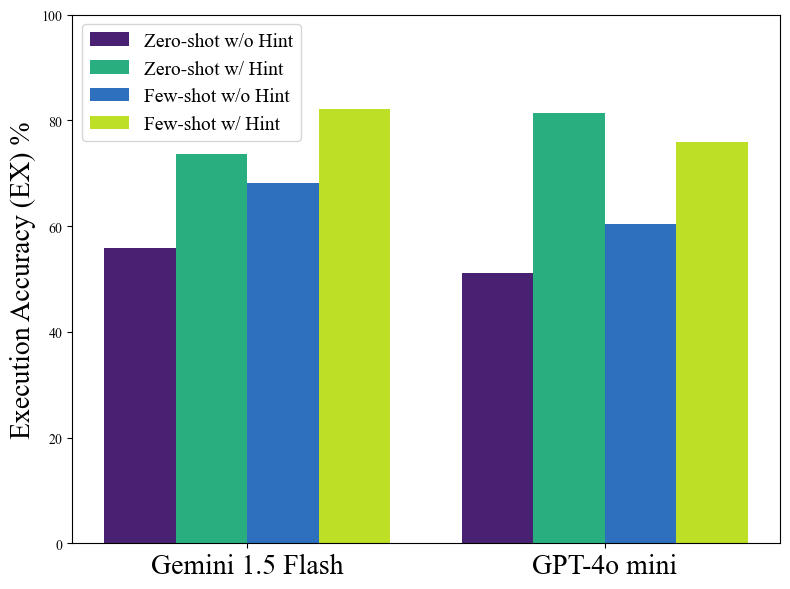

In [9]:
models = ['Gemini 1.5 Flash', 'GPT-4o mini']
conditions = ['Zero-shot w/o Hint', 'Zero-shot w/ Hint', 'Few-shot w/o Hint', 'Few-shot w/ Hint']

data = np.array([
    [df.loc[0, 'ex_total'], df.loc[2, 'ex_total'], df.loc[4, 'ex_total'], df.loc[6, 'ex_total']],  # Gemini
    [df.loc[1, 'ex_total'], df.loc[3, 'ex_total'], df.loc[5, 'ex_total'], df.loc[7, 'ex_total']],  # GPT-4 mini
])

colors = ['#482173', '#29af7f', '#2e6fbe', '#bddf26']

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Ancho de las barras y posiciones
bar_width = 0.2  # Hacer las barras más estrechas para que quepan mejor
index = np.arange(len(models))  # Indices para las etiquetas en el eje x

for i in range(len(conditions)):
    ax.bar(index + i * bar_width - bar_width /2, data[:, i], bar_width, label=conditions[i], color=colors[i % len(colors)])  # Utilizar el operador módulo para asegurarse de que el índice esté dentro del rango


# Añadir anotaciones de porcentaje encima de las barras
#for i in range(len(conditions)):
#    for j in range(len(models)):
#        ax.annotate(f"{data[j, i]:.2f}%", 
#                    (index[j] + i * bar_width - bar_width / 2, data[j, i] + 1), 
#                    ha='center', va='bottom', fontsize=9)

# Configuración de etiquetas y leyenda
ax.set_ylabel('Execution Accuracy (EX) %', fontsize=20)
#ax.set_title('Execution Accuracy by Model and Condition')
#ax.set_xticks(index)  # Centrar etiquetas de modelos
ax.set_xticks(index + bar_width) # * (len(conditions) - 1) / 2)  # Centrar etiquetas de modelos
ax.set_xticklabels(models, fontsize=20)


# Añadir leyenda
ax.legend(loc='upper left', fontsize=14)

# Ajustar el límite del eje y
ax.set_ylim(0, 100)

#ax.grid()

# Ajustar los márgenes para que el gráfico no se corte
plt.tight_layout()

plt.savefig('imagen/ex_total.png', dpi=500, bbox_inches='tight')
# Mostrar el gráfico
plt.show()


In [86]:
db = pd.read_json('bird_db/superhero_complete.json')

In [ ]:
db